In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# December 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Iterations until convergence:
  Gradient Descent:              195
  Classical Momentum:            59
  Nesterov Momentum:             40


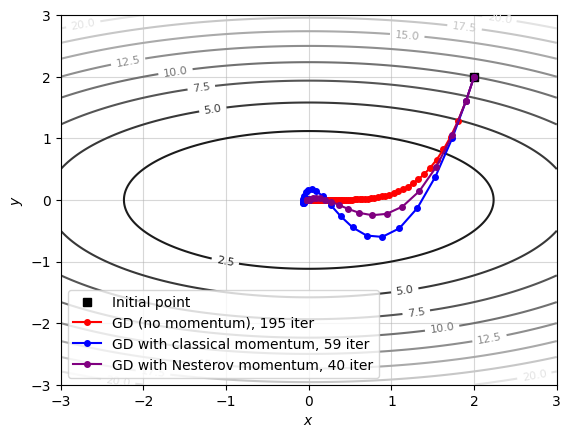

In [5]:
# Define the function and gradient (quadratic example)
def f(x, y):
    return 0.5*x**2 + 2*y**2

def grad_f(x, y):
    return np.array([x, 4*y])

# Parameters
alpha = 0.05         # learning rate
beta = 0.7           # momentum coefficient
tol = 1e-4           # stopping tolerance on gradient norm
max_steps = 5000     # safety cap
initial_point = np.array([2.0, 2.0])

# ---------------------------------------------------------------------
# Gradient Descent (no momentum)
# ---------------------------------------------------------------------
x = initial_point.copy()
trajectory_gd = [x.copy()]
for step in range(max_steps):
    g = grad_f(x[0], x[1])
    if np.linalg.norm(g) < tol:
        break
    x = x - alpha * g
    trajectory_gd.append(x.copy())
steps_gd = step + 1
trajectory_gd = np.array(trajectory_gd)

# ---------------------------------------------------------------------
# Gradient Descent with Classical Momentum
# ---------------------------------------------------------------------
x = initial_point.copy()
v = np.zeros_like(x)
trajectory_mom = [x.copy()]
for step in range(max_steps):
    g = grad_f(x[0], x[1])
    if np.linalg.norm(g) < tol:
        break
    v = beta * v + g
    x = x - alpha * v
    trajectory_mom.append(x.copy())
steps_mom = step + 1
trajectory_mom = np.array(trajectory_mom)

# ---------------------------------------------------------------------
# Gradient Descent with Nesterov Momentum
# ---------------------------------------------------------------------
x = initial_point.copy()
v = np.zeros_like(x)
trajectory_nes = [x.copy()]
for step in range(max_steps):
    lookahead = x - alpha * beta * v   # lookahead position
    g = grad_f(lookahead[0], lookahead[1])
    if np.linalg.norm(g) < tol:
        break
    v = beta * v + g
    x = x - alpha * v
    trajectory_nes.append(x.copy())
steps_nes = step + 1
trajectory_nes = np.array(trajectory_nes)

# ---------------------------------------------------------------------
# Print iteration counts for comparison
# ---------------------------------------------------------------------
print("Iterations until convergence:")
print(f"  Gradient Descent:              {steps_gd}")
print(f"  Classical Momentum:            {steps_mom}")
print(f"  Nesterov Momentum:             {steps_nes}")

# ---------------------------------------------------------------------
# Plotting
# ---------------------------------------------------------------------
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig, ax = plt.subplots()

# Contours
contours = ax.contour(X, Y, Z, levels=10, cmap='gray')
ax.clabel(contours, inline=True, fontsize=8)

# Mark start point
ax.plot(initial_point[0], initial_point[1], 'ks', label='Initial point')

# Trajectories
ax.plot(trajectory_gd[:,0], trajectory_gd[:,1], 'o-', color='red',
        markersize=4, label=f"GD (no momentum), {steps_gd} iter")
ax.plot(trajectory_mom[:,0], trajectory_mom[:,1], 'o-', color='blue',
        markersize=4, label=f"GD with classical momentum, {steps_mom} iter")
ax.plot(trajectory_nes[:,0], trajectory_nes[:,1], 'o-', color='purple',
        markersize=4, label=f"GD with Nesterov momentum, {steps_nes} iter")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(alpha=0.5)

plt.savefig('figures/momentum_methods.pdf')